# 1er TP de sistemas inteligentes

Nombre: Mateo Pablo Cetti (ID UCC: 2011681)

Este trabajo práctico se aprueba completando más del 70% del mismo. Una vez completado el notebook y reenvielo al email 2329034@ucc.edu.ar. Importante: Asegurese que su correo haya llegado.

### Entender el problema

El hundimiento del Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, considerado ampliamente "insumergible", se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y tripulantes.

Si bien hubo cierto elemento de suerte en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

* Siendo la clase positiva la indicación qué la persona sobrevive ¿Qué le estaría pidiendo a mi clasificador qué tenga en cuenta si le pido un puntaje de precision alto?

<10%>
**Respuesta**: Pidiendole a mi clasificador un puntaje de **precision** alto implicaria que quiero medir con mayor exactitud la capacidad del modelo para identificar correctamente los casos positivos y evitar errores de predicción de falsos positivos. Hacer esto implicaría sacrificar **recall**.

En este caso, yo desearía que mi modelo no marque que una persona sobrevivió cuando en realidad no llego a hacerlo.

### Obtención de datos
Importe las librerías a utilizar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, f1_score, precision_score


Importe los datos:

In [2]:
url = "https://gitlab.com/francisco.arduh/datasets/-/raw/main/Titanic-Dataset.csv"
df = pd.read_csv(url)

<10%> Realice una exploración de los datos, compruebe si existe faltante de datos en alguna columna, que tipo de distribución tienen los datos, si alguna columna tiene muchos datos únicos.

In [3]:
def print_df_data(text:str, func, kwargs: dict):
    print(f"\n", "*"*150)
    print(f"{text}")
    display(func(**kwargs))
    print("\n")

df_requested_data = [
    {"text": "Obteneniendo los primeros datos de la tabla", "func": df.head, "args": {} },
    {"text": "Obteniendo la distribución de los datos", "func": df.describe, "args": {}},
    {"text": "Obteniendo las correlaciones entre los datos", "func": df.corr, "args": {"numeric_only":True}},
    {"text": "Obteniendo las columnas con datos nulos", "func": df.isnull().sum, "args": {}},
]

for section in df_requested_data:
    print_df_data(section["text"], section["func"], section["args"])



 ******************************************************************************************************************************************************
Obteneniendo los primeros datos de la tabla


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S





 ******************************************************************************************************************************************************
Obteniendo la distribución de los datos


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200





 ******************************************************************************************************************************************************
Obteniendo las correlaciones entre los datos


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000





 ******************************************************************************************************************************************************
Obteniendo las columnas con datos nulos


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Realizando una exploración de los datos, podemos ver que el dataset esta compuesto por las siguientes "Features":
* **PassengerID**: id del pasajero
* **Survived**: Si sobrevivio o no (que seria nuestro **target**)
* **Pclass**: La clase del ticket
* **Name**: El nombre del mismo
* **Sex**: El sexo la pasajera / pasajero
* **Age**: La edad del mismo
* **SibSp**: Numero de hermanas/os a bordo en el barco
* **Parch**: Numero de padres / madres a bordo en el barco
* **Ticket**: el identificador del ticket con el que el pasajero accedio al barco
* **Fare**: La cantidad de dinero que gasto el pasajero para comprar el pasaje
* **Cabin**: El numero de la cabina 
* **Embarked**: La letra inicial de la ciudad / puerto en la que embarco.

Haciendo un `df.head()` podemos ver que la columna **Cabin** Contiene elementos `NaN`, La columna **name** contiene datos unicos (el nombre y apellido de la pasajera / pasajero).
Mediante el uso de las otras funciones tambien visualizamos las distribuciones de los datos y las relaciones entre los mismos.

Ademas, con la ultima linea vemos que tanto **Age** como **Cabin** y **Embarked** tienen valores nulos.

<5%> Separar X_train, y_train, X_test, y_test

In [4]:
y = df["Survived"]
x = df.drop("Survived", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

En estas lineas de codigo, separamos el dataframe en dos sub dataframes, x e y. En **X** guardamos todos los datos con los que **entrenaremos** y **testearemos** el modelo a implementar, y en **Y** Guardamos los resultados  o labels con los que verificaremos el funcionamiento del modelo y sus predicciones (Aprendizaje supervisado). Mas especificamente hablando, `x_train` e `y_train` son los sub dataframes que utilizaremos para el **entrenamiento** y `x_test` e `y_test` son los que se usaran para el testeo. Para separar estos sub dataframes utilizamos la **función** provista por **scikit-learn** `train_test_split`

### Procesado y transformación de datos
<10%> ¿Qué transformaciones debería aplicar? Especifique y justifique por grupo de columnas.

Por ejemplo: columna A, B y C aplicaría transformación X porque ...

Escriba los nombres de las columna en una lista por cada grupo:

Las columnas que yo personalmente transformaria son:
* [ **PassengerId** | **Name** | **Ticket** | **Cabin** ] - Estas features las removería ya que bajo mi punto de vista, tanto el nombre del pasajero, como su id, numero de cabina y numero de ticket no aportarían nada en el proceso de toma de decision al momento de rescatar a dichos pasajeros en los botes salvavidas, y por lo tanto no afecta a su supervivencia en dicho caso.
* [ **Sex** | **Embarked** ] - Estas features las transformaria o encodearía para que dejen de ser categoricas y transformarlas a numericas, hecho que haría que el modelo procese mucho mejor dicha información.
* [ **Age** ] - A esta feature le aplicaria con **SimpleImputer** la tecnica **mean** para remover los valores nulos.

<15%> A continuación escriba el código para realizar las transformaciones.

In [5]:
class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, x, y=None):
        return self

    def transform(self, x):
        imputer = SimpleImputer(strategy="mean")
        imputer.set_output(transform="pandas")
        x["Age"] = imputer.fit_transform(x[["Age"]])
        return x
    

class EmbarkedEncoder(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(x[["Embarked"]]).toarray()
        column_names = encoder.get_feature_names_out()
        for i in range(len(matrix.T)):
            x[column_names[i]] = matrix.T[i]
        return x


class SexEncoder(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(x[["Sex"]]).toarray()
        column_names = encoder.get_feature_names_out()
        for i in range(len(matrix.T)):
            x[column_names[i]] = matrix.T[i]
        return x
    

class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        return x.drop(["PassengerId", "Embarked", "Name", "Ticket", "Cabin", "Sex"], axis=1)
    
pipeline = Pipeline([
    ("age", AgeImputer()),
    ("embarkencoder", EmbarkedEncoder()),
    ("sexencoder", SexEncoder()),
    ("featuredropper", FeatureDropper()),
])

x = pipeline.fit_transform(x)
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.fit_transform(x_test)


# Fix para ejecutar correctamente la ultima consigna.
if "Embarked_nan" not in x_test.columns:
    x_test.insert(8, "Embarked_nan", 0)


En estas lineas de codigo creamos algunas clases personalizadas que heredan de **BaseEstimator** y **TransformerMixin** e implementamos los metodos `fit` y `transform` (en este ultimo con las transformaciones requeridas para realizar a nuestro dataframe) con la intención de insertar estas clases en un **pipeline** para que este realize dichas transformaciones en el dataframe correspondiente.

Personalmente no removi ni modifique las features **SibSp**, **Parch** y **Fare** ya que para mi si tienen algún que otro impacto en la supervivencia de los pasajeros, y como podemos ver, al principio del documento cuando ejecutamos `df.corr()` entre estas features y la supervivencia de los pasajeros hay una correlación considerable.

### Selección de modelo y entrenamiento
 


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
cla_log = LogisticRegression()
cla_rf = RandomForestClassifier()

<15%>Utilice validación cruzada para evaluar los modelos que se importaron. Utilice el de area bajo la curva roc mas alto.
Utilizar el metodo "cross_val_predict", tenga en cuenta que la variable, "method" para el LogisticRegression es "decision_function" y para RandomForestClassifier es "predict_proba" (ver clase o libro)

<10%>¿Por qué lo eligiria el modelo por el area bajo la curva roc?

/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

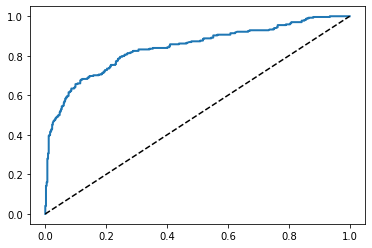

'ROC AUC - log: 0.8410817533951862'

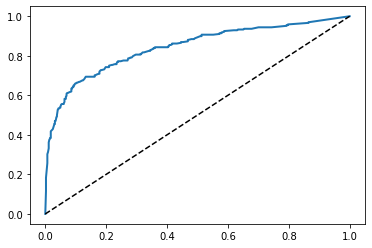

'ROC AUC - rf: 0.842065012773968'

In [7]:
# Función para graficar la curva
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0,1], 'k--')

# --- Logistic Regression
log_scores = cross_val_score(cla_log, x_train, y_train, cv=3, scoring="accuracy")

log_y_predict = cross_val_predict(cla_log, x_train, y_train, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train, log_y_predict)

log_roc_score = roc_auc_score(y_train, log_y_predict)
plot_roc_curve(fpr, tpr)

plt.show()
display(f"ROC AUC - log: {log_roc_score}")

# --- Random Forest

rf_scores = cross_val_score(cla_rf, x_train, y_train, cv=3, scoring="accuracy")

rf_y_predict = cross_val_predict(cla_rf, x_train, y_train, cv=3, method="predict_proba")
y_scores_probes = rf_y_predict[:, 1]

rf_roc_score = roc_auc_score(y_train, y_scores_probes)
fpr, tpr, thresholds = roc_curve(y_train, y_scores_probes)
plot_roc_curve(fpr, tpr)

plt.show()
display(f"ROC AUC - rf: {rf_roc_score}")

Utilizaria el area bajo la curva roc como metrica para evaluar un modelo y el equilibrio entre la tasa de verdaderos positivos  y la tasa de falsos positivos en diferentes puntos de dicho modelo.



<15>Utilice el metodo grid search sobre el modelo elegido  
en caso de ser LogisticRegression
```
param_grid = [
{'C': [0.1, 1, 10], 'penalty': ['elasticnet'], 'l1_ratio': [0.,0.2,0.4]}
]
```
en caso de ser RandomForest utilize:
```
param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]
```
¿Cuál es el sentido de hacer esto?

In [8]:

param_grid_log = [
{'C': [0.1, 1, 10]} # Corrección hecha en clase
]
param_grid_rf = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]

grid_search_log = GridSearchCV(cla_log, param_grid_log, return_train_score=True, cv=3)
grid_search_log.fit(x_train, y_train)
print(f"Mejores hiperparametros log: {grid_search_log.best_params_}")

grid_search_rf = GridSearchCV(cla_rf, param_grid_rf, return_train_score=True, cv=3)
grid_search_rf.fit(x_train, y_train)
display(f"Mejores hiperparametros rf: {grid_search_rf.best_params_}")

/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Mejores hiperparametros log: {'C': 1}


"Mejores hiperparametros rf: {'max_features': 6, 'n_estimators': 100}"

El sentido de hacer esto es encontrar los mejores **hiperparametros** para los modelos en cuestión, de tal forma que mejoramos el funcionamiento de los mismos.

<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de validación

In [9]:

log_validation_region  =(log_y_predict >=0.0)
val_acc_log = accuracy_score(y_train, log_validation_region)
val_rec_log = recall_score(y_train, log_validation_region)
val_pres_log = precision_score(y_train, log_validation_region)
val_f1_log = f1_score(y_train, log_validation_region)
val_auc_roc_log = roc_auc_score(y_train, log_y_predict)

print("Logistic\n")
print(f"Accuracy: {val_acc_log}")
print(f"Recall: {val_rec_log}")
print(f"Precision: {val_pres_log}")
print(f"f1: {val_f1_log}")
print(f"roc: {val_auc_roc_log}")

print("*"*200,"\n")

rf_validation_region = (y_scores_probes >= 0.5)
val_acc_rf = accuracy_score(y_train,  rf_validation_region)
val_rec_rf = recall_score(y_train, rf_validation_region)
val_pres_rf = precision_score(y_train, rf_validation_region)
val_f1_rf = f1_score(y_train, rf_validation_region)
val_auc_roc_rf = roc_auc_score(y_train, y_scores_probes)

print("Random forest\n")
print(f"Accuracy: {val_acc_rf}")
print(f"Recall: {val_rec_rf}")
print(f"Precision: {val_pres_rf}")
print(f"f1: {val_f1_rf}")
print(f"roc: {val_auc_roc_rf}")

Logistic

Accuracy: 0.7991573033707865
Recall: 0.6828358208955224
Precision: 0.7593360995850622
f1: 0.7190569744597248
roc: 0.8410817533951862
******************************************************************************************************************************************************************************************************** 

Random forest

Accuracy: 0.7907303370786517
Recall: 0.6940298507462687
Precision: 0.7351778656126482
f1: 0.7140115163147792
roc: 0.842065012773968


<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de test, 
¿Los números son parecido a lo obtenido en las regiones de validación? ¿A qué puede deberse?

In [10]:

test_log_y_predict = grid_search_log.predict(x_test)

test_acc_log = accuracy_score(y_test, test_log_y_predict)
test_rec_log = recall_score(y_test, test_log_y_predict)
test_pres_log = precision_score(y_test, test_log_y_predict)
test_f1_log = f1_score(y_test, test_log_y_predict)
test_roc_auc_log = roc_auc_score(y_test, test_log_y_predict)

print("Logistic\n")
print(f"Accuracy: {test_acc_log}")
print(f"Recall: {test_rec_log}")
print(f"Precision: {test_pres_log}")
print(f"f1: {test_f1_log}")
print(f"roc: {test_roc_auc_log}")

print("*"*200)

test_rf_y_predict = grid_search_rf.predict(x_test)


acc_rf = accuracy_score(y_test,  test_rf_y_predict)
rec_rf = recall_score(y_test, test_rf_y_predict)
pres_rf = precision_score(y_test, test_rf_y_predict)
f1_rf = f1_score(y_test, test_rf_y_predict)
test_rf_auc_log = roc_auc_score(y_test, test_rf_y_predict)

print("Random forest\n")
print(f"Accuracy: {acc_rf}")
print(f"Recall: {rec_rf}")
print(f"Precision: {pres_rf}")
print(f"f1: {f1_rf}")
print(f"roc: {test_rf_auc_log}")

Logistic

Accuracy: 0.7988826815642458
Recall: 0.7162162162162162
Precision: 0.7794117647058824
f1: 0.7464788732394366
roc: 0.7866795366795367
********************************************************************************************************************************************************************************************************
Random forest

Accuracy: 0.8156424581005587
Recall: 0.7432432432432432
Precision: 0.7971014492753623
f1: 0.7692307692307693
roc: 0.8049549549549551


Como podemos ver, los numeros obtenidos en ambas regiones son similares pero con diferencias visibles. En general, se espera que las métricas de un modelo sean similares entre las regiones de validación y de prueba. Sin embargo, es posible que existan pequeñas diferencias debido a ciertas variaciones entre las dos regiones.

Las diferencias entre las métricas de validación y prueba pueden deberse a varias razones. Una de las razones más comunes es que la validación y la prueba se realizan en diferentes conjuntos de datos. Por lo tanto, si las dos regiones de datos difieren significativamente, las métricas también pueden diferir.